In [14]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

import sys
sys.path.append('../src')
from utils import draw_graph2D
from fuzzy_elpigraph import Fuzzy_ElpiGraph
from lizard_brain import lizard_brain
from sklearn.decomposition import PCA

In [139]:
#df = pd.read_csv('../data/test.csv')
df = pd.read_csv('../data/Xlat.csv')
X = torch.tensor(df.to_numpy().astype(np.float32))

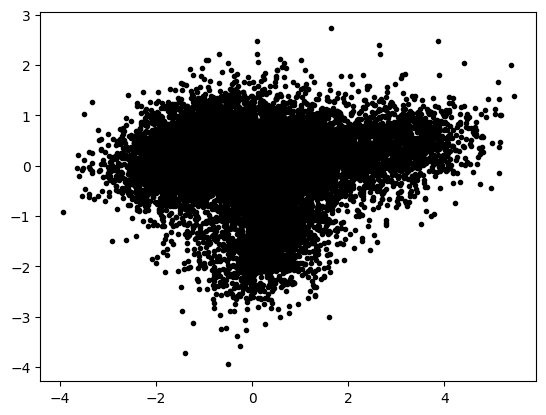

In [140]:
pca = PCA()
u = pca.fit_transform(X)
v = pca.components_
plt.plot(u[:,0],u[:,1],'k.')

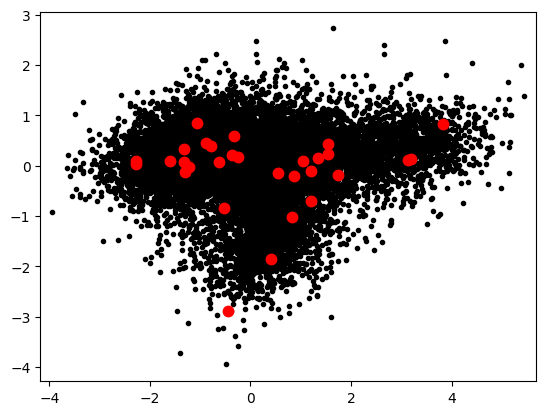

numiter=50
step=1,MSE=nan,Stretch=0.0,Harmonic=0.0
step=2,MSE=nan,Stretch=nan,Harmonic=nan
step=3,MSE=nan,Stretch=nan,Harmonic=nan
step=4,MSE=nan,Stretch=nan,Harmonic=nan
step=5,MSE=nan,Stretch=nan,Harmonic=nan
step=6,MSE=nan,Stretch=nan,Harmonic=nan
step=7,MSE=nan,Stretch=nan,Harmonic=nan
step=8,MSE=nan,Stretch=nan,Harmonic=nan
step=9,MSE=nan,Stretch=nan,Harmonic=nan
step=10,MSE=nan,Stretch=nan,Harmonic=nan
step=11,MSE=nan,Stretch=nan,Harmonic=nan
step=12,MSE=nan,Stretch=nan,Harmonic=nan
step=13,MSE=nan,Stretch=nan,Harmonic=nan
step=14,MSE=nan,Stretch=nan,Harmonic=nan
step=15,MSE=nan,Stretch=nan,Harmonic=nan
step=16,MSE=nan,Stretch=nan,Harmonic=nan
step=17,MSE=nan,Stretch=nan,Harmonic=nan
step=18,MSE=nan,Stretch=nan,Harmonic=nan
step=19,MSE=nan,Stretch=nan,Harmonic=nan
step=20,MSE=nan,Stretch=nan,Harmonic=nan
step=21,MSE=nan,Stretch=nan,Harmonic=nan
step=22,MSE=nan,Stretch=nan,Harmonic=nan
step=23,MSE=nan,Stretch=nan,Harmonic=nan
step=24,MSE=nan,Stretch=nan,Harmonic=nan
step=25,MSE=na

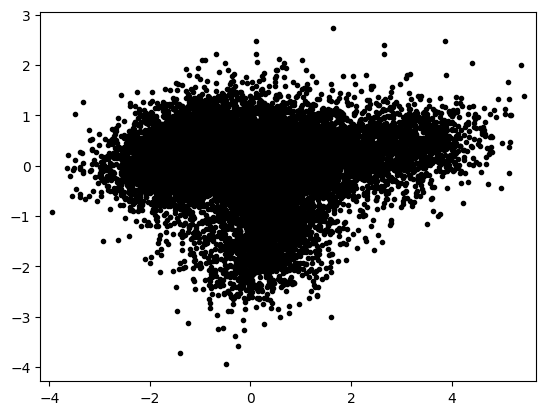

In [141]:
#for k in np.arange(50,90,1):
#torch.manual_seed(k)
#torch.manual_seed(62)
torch.manual_seed(10)
fepgr = Fuzzy_ElpiGraph(X.shape[1],number_of_nodes=30,computeMST=True,intrinsicOptimization=False,alphaKmeans=20)
fepgr._initNodePositions(X)
mn = X.mean(axis=0)
upca = (X - mn)@v.T
ypca = (fepgr.y.detach() - mn)@v.T
draw_graph2D(upca,ypca,fepgr.A,scale=0.5)
fepgr._intrinsic_optimization(X,verbose=True)
mn = X.mean(axis=0)
Xc = X - mn
yc = fepgr.y.detach() - mn
upca = Xc@v.T
ypca = yc@v.T
#y, loss = fepgr.forward(X)
#fepgr._intrinsic_optimization(X,verbose=False)
draw_graph2D(upca,ypca,fepgr.A,scale=0.5)

In [160]:
total_params = sum(p.numel() for p in fepgr.parameters())
print(f"Total number of parameters: {total_params}")

Total number of parameters: 90


/home/zinovyev/gits/deep_fuzzy_elpigraph/notebooks/../src/lizard_brain.py:79: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(u[irx==lab,0],u[irx==lab,1],'k.',color=col,markersize=1,linewidth=1)


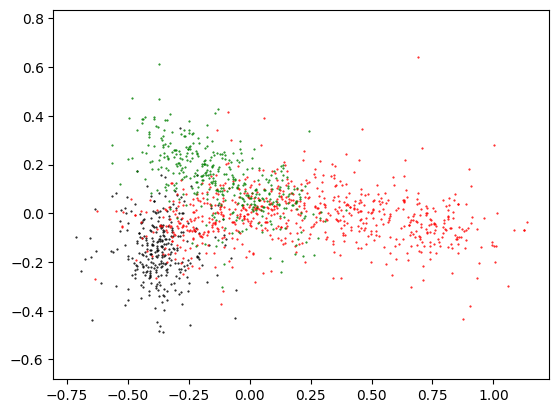

In [125]:
import random
np.random.seed(19)
[X,irx,v,u,s] = lizard_brain(number_of_branches=1,dimension=4,show_fig=True,add_noise=0.05,epsilon=0.001)
X = torch.tensor(X,dtype=torch.float)

In [11]:
pd.DataFrame(X.numpy()).to_csv('../data/1_branch_3D.csv',index=None,header=None)

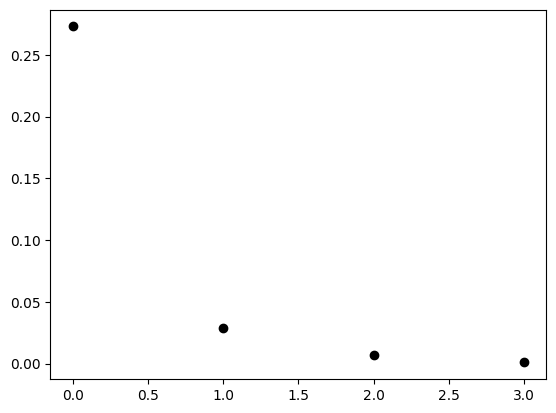

In [56]:
plt.plot(s,'ko')

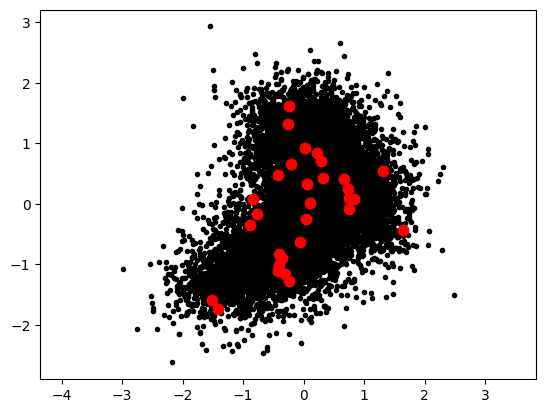

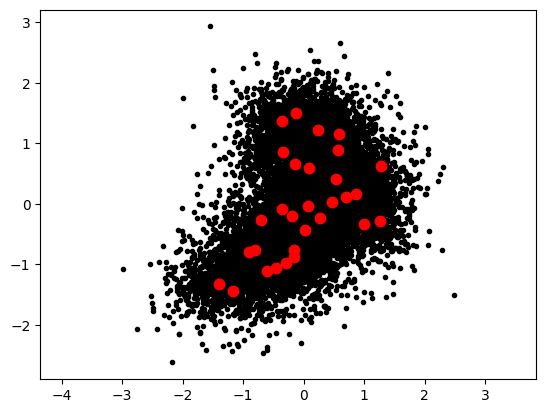

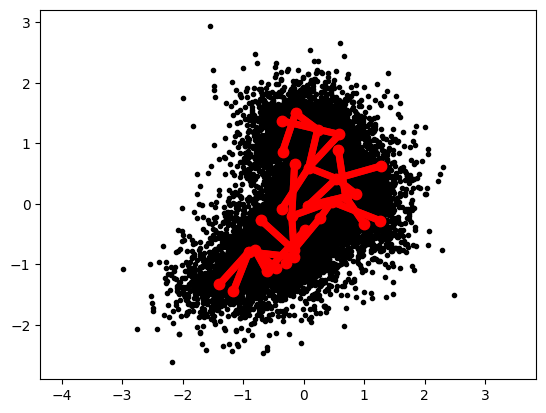

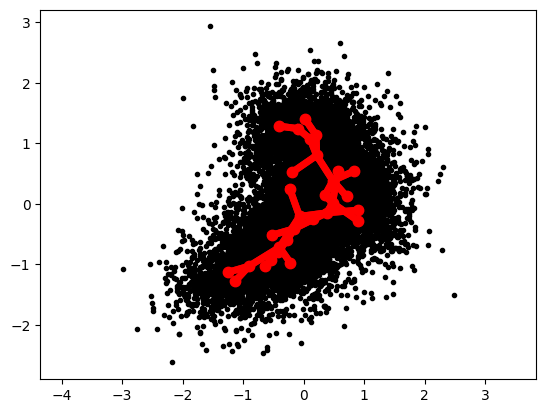

In [143]:
torch.manual_seed(5)
fepgr = Fuzzy_ElpiGraph(X.shape[1],number_of_nodes=30,computeMST=True,intrinsicOptimization=True,alphaFuzzyGraph=5,alphaKmeans=10,lmda=0.01,mu=0.1,intrinsicLearningRate=0.01)
fepgr._initNodePositions(X)
draw_graph2D((X-X.mean(axis=0))@v,(fepgr.y.detach()-X.mean(axis=0))@v,fepgr.A,scale=0.5)
fepgr._intrinsic_optimization(X)
draw_graph2D((X-X.mean(axis=0))@v,(fepgr.y.detach()-X.mean(axis=0))@v,fepgr.A,scale=0.5)
fepgr._computeFuzzyGraph()
fepgr._computeMST()
draw_graph2D((X-X.mean(axis=0))@v,(fepgr.y.detach()-X.mean(axis=0))@v,fepgr.A,scale=0.5)
fepgr._intrinsic_optimization(X)
draw_graph2D((X-X.mean(axis=0))@v,(fepgr.y.detach()-X.mean(axis=0))@v,fepgr.A,scale=0.5)


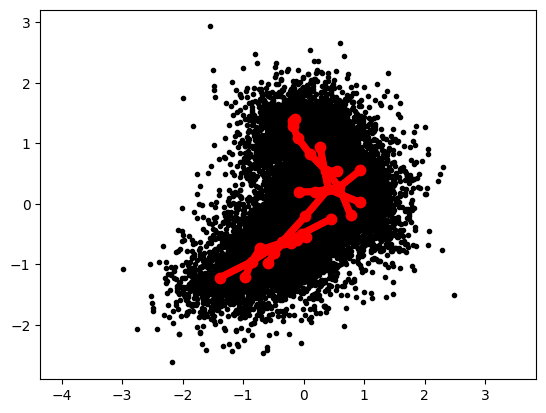

In [150]:
torch.manual_seed(5)
fepgr = Fuzzy_ElpiGraph(X.shape[1],number_of_nodes=30,computeMST=True,intrinsicOptimization=True,alphaFuzzyGraph=10,alphaKmeans=10,lmda=0.01,mu=0.1,intrinsicLearningRate=0.05)
fepgr._initNodePositions(X)
fepgr._intrinsic_optimization(X,verbose=False)
y, loss = fepgr.forward(X)
draw_graph2D((X-X.mean(axis=0))@v,(fepgr.y.detach()-X.mean(axis=0))@v,fepgr.A,scale=0.5)
